In [13]:
from rfgap import RFGAP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pi_sim_data import sim_data

from pi_test_functions import linear_sum, exponential_difference, exponential_interaction

In [14]:
x = np.random.multivariate_normal([0, 0], np.eye(2), 10000)

In [15]:
x.shape
y = exponential_interaction(x)
alpha = 0.05

In [16]:
rf = RFGAP(prediction_type = 'regression', oob_score = mean_squared_error)
rf.fit(x, y)
oob_pi = rf.oob_prediction_se(y, alpha = alpha)
rf.oob_quantile_se(y, alpha = alpha)


In [17]:
print('Expected Coverage: ', 1 - alpha)
print('Actual Coverage: ', rf.oob_pi_coverage)
print('Quantile Coverage: ', rf.q_pi_coverage)

Expected Coverage:  0.95
Actual Coverage:  0.6432
Quantile Coverage:  0.9489


In [18]:
# plt.figure(figsize=(8, 8))
# plt.scatter(x, rf.oob_prediction_, label='OOB Predictions', s = 0.5)
# plt.plot(x, y, label='True function', color='orange')
# plt.errorbar(x, rf.oob_prediction_, oob_pi, c = 'gray', alpha = 0.5)

<Axes: ylabel='Count'>

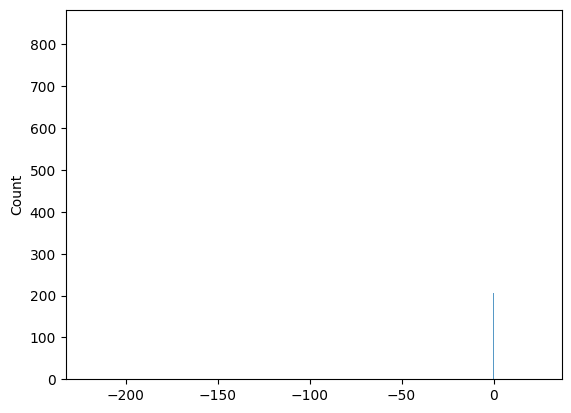

In [19]:
sns.histplot(rf.oob_prediction_ - y)

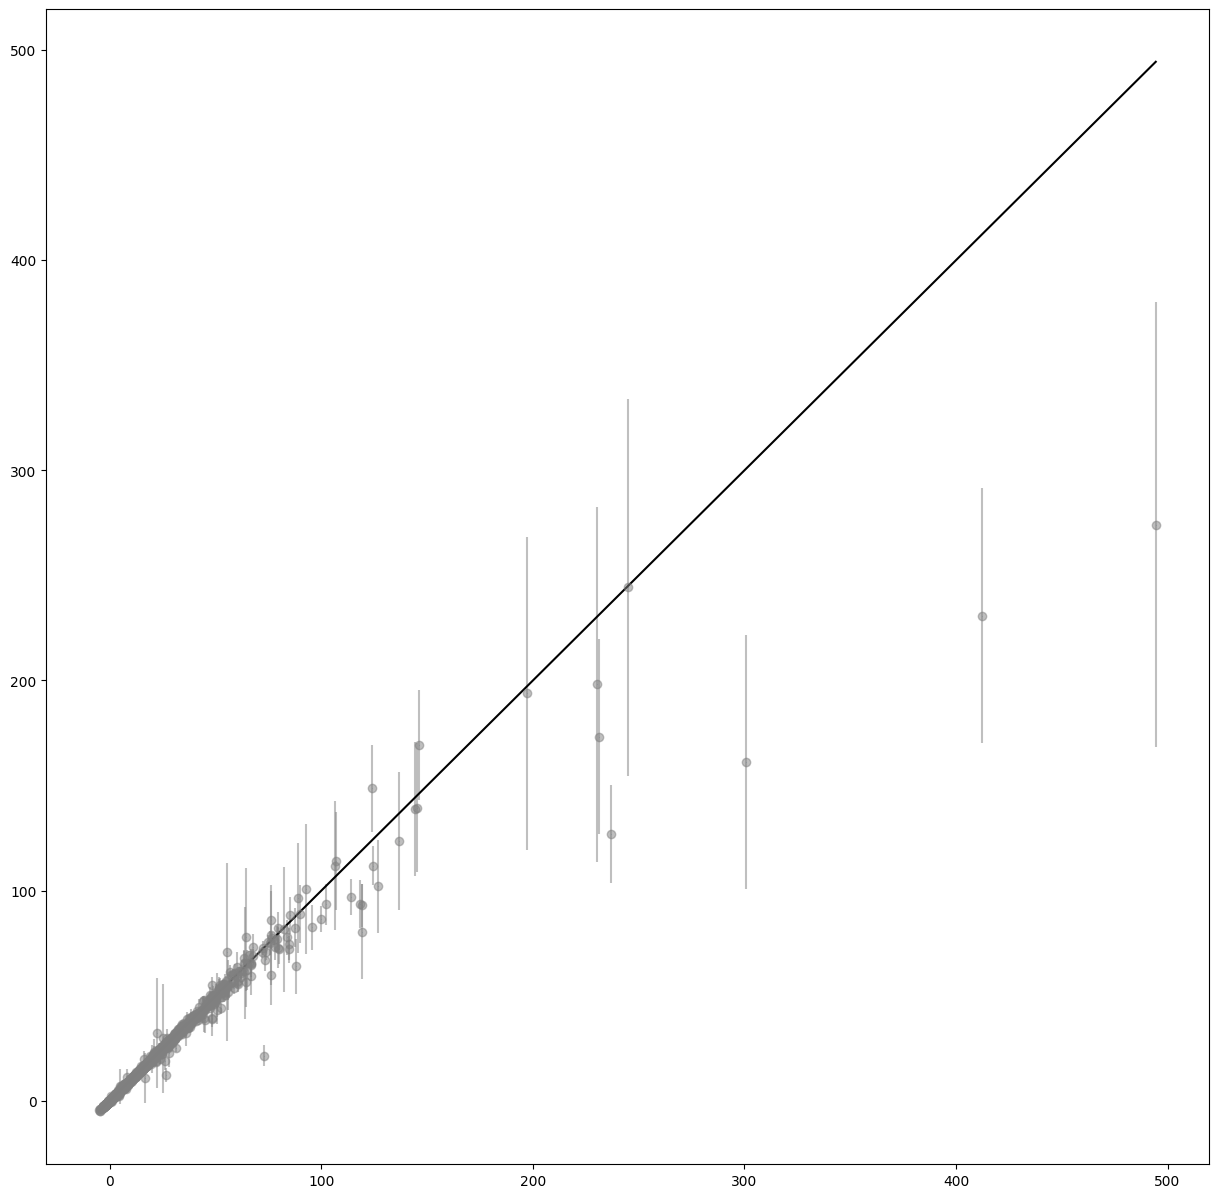

In [20]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x = y, y = rf.oob_prediction_, s = 0.2)
plt.errorbar(y, rf.oob_prediction_, yerr = oob_pi, c = 'gray', alpha = 0.5, fmt = 'o')
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')

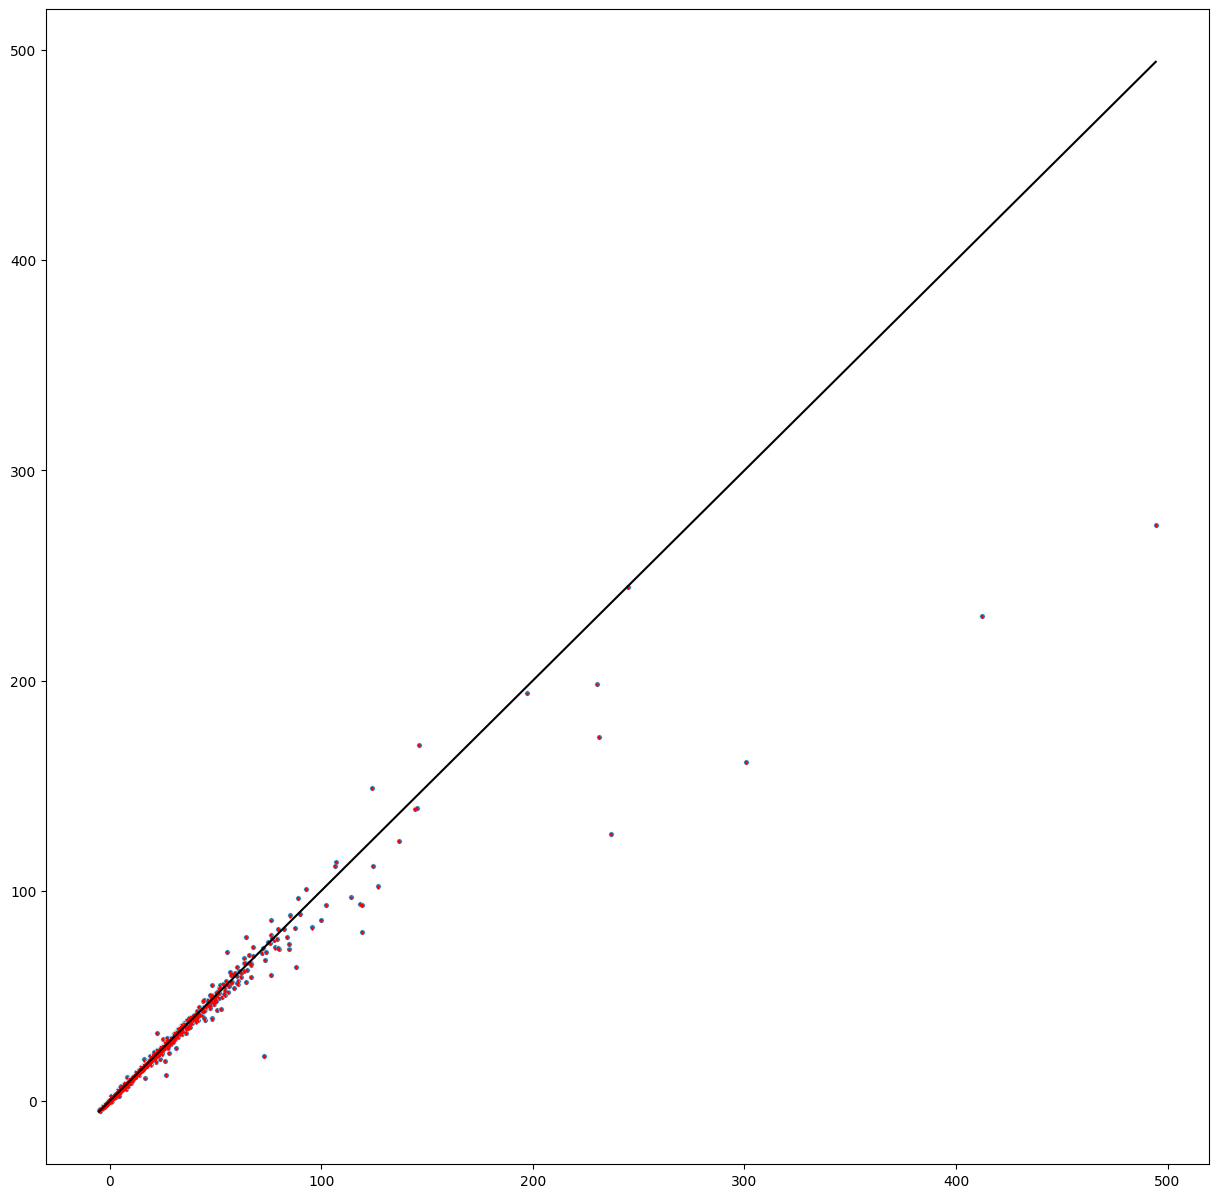

In [21]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x = y, y = rf.oob_prediction_, s = 15)
plt.vlines(y, ymin = rf.oob_prediction_, ymax = rf.ub_q, colors = 'red', alpha = 1)
plt.vlines(y, ymin = rf.lb_q, ymax = rf.oob_prediction_, colors = 'red', alpha = 1)
plt.scatter(y, rf.lb_q, c = 'red', s = 0.5)
plt.plot(np.linspace(np.min(y), np.max(y)), np.linspace(np.min(y), np.max(y)), c = 'black')

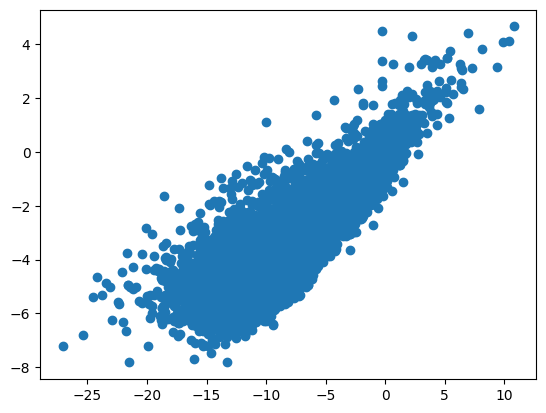

In [31]:
plt.scatter(np.log((rf.oob_prediction_ - y)**2), np.log(oob_pi))

In [32]:
np.corrcoef(np.log((rf.oob_prediction_ - y)**2), np.log(oob_pi))

array([[1.        , 0.80034779],
       [0.80034779, 1.        ]])

In [33]:
np.corrcoef((rf.oob_prediction_ - y)**2, oob_pi)

array([[1.        , 0.57696611],
       [0.57696611, 1.        ]])

In [ ]:
# what to do about cases that are not near any other points?